<a href="https://colab.research.google.com/github/jpdatahive/multi-class-weather-classification/blob/main/multi_class_weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Classificação de Imagens do Clima usando Transfer Learning com Keras

## Introdução

A classificação precisa de condições climáticas a partir de imagens é uma tarefa importante em várias áreas, incluindo previsão do tempo, agricultura, transporte e turismo. Identificar condições como sol, chuva, neve, neblina e tempestades pode fornecer informações valiosas para tomadas de decisão mais informadas e eficazes. Com os avanços em técnicas de aprendizado profundo, especialmente em redes neurais convolucionais (CNNs), podemos automatizar e aumentar a precisão desse processo. Utilizando transferência de aprendizado com Keras, podemos aproveitar modelos pré-treinados com alto desempenho em tarefas de classificação de imagens e adaptá-los para identificar diferentes condições climáticas.

## Motivação

A classificação tradicional de condições climáticas a partir de imagens requer análise manual, que pode ser demorada e sujeita a erros. Com a aplicação de aprendizado profundo, temos a oportunidade de automatizar essa tarefa, melhorando a eficiência e a precisão. Modelos pré-treinados podem ser ajustados para nossa tarefa específica, permitindo a utilização de conjuntos de dados menores e reduzindo o tempo de desenvolvimento. Este projeto pode ser útil para aplicações práticas, como sistemas de previsão do tempo, monitoramento ambiental e segurança em transportes.

## Objetivos

O objetivo deste projeto é desenvolver um modelo de aprendizado profundo capaz de classificar diferentes condições climáticas a partir de imagens utilizando técnicas de transferência de aprendizado. Os principais objetivos incluem:

1. **Preparação do Dataset**: Coletar e pré-processar um conjunto de imagens representando diferentes condições climáticas.
2. **Transferência de Aprendizado**: Utilizar um modelo pré-treinado (como VGG16, ResNet50, InceptionV3, etc.) e adaptá-lo para a tarefa específica de classificação das imagens climáticas.
3. **Treinamento e Validação**: Treinar o modelo utilizando um subconjunto das imagens e validar seu desempenho com outro subconjunto.
4. **Avaliação do Modelo**: Avaliar a acurácia, precisão, recall e F1-score do modelo desenvolvido.

## Metodologia

A abordagem para este projeto inclui as seguintes etapas:

1. **Coleta e Preparação dos Dados**: Reunir imagens de alta qualidade representando diversas condições climáticas, dividindo-as em conjuntos de treinamento, validação e teste.
2. **Configuração do Ambiente**: Configurar o ambiente no Google Colab com as bibliotecas necessárias, como Keras e TensorFlow.
3. **Transferência de Aprendizado**: Carregar um modelo pré-treinado e realizar o fine-tuning para a nova tarefa de classificação.
4. **Treinamento do Modelo**: Treinar o modelo com as imagens de treinamento, monitorando o desempenho em um conjunto de validação.
5. **Avaliação e Ajustes**: Avaliar o desempenho do modelo no conjunto de teste e ajustar hiperparâmetros conforme necessário.

## Expectativas

Espera-se que a utilização de transferência de aprendizado permita obter um modelo robusto e preciso para a classificação das condições climáticas com uma quantidade relativamente pequena de dados de treinamento, devido ao conhecimento prévio capturado pelos modelos pré-treinados. O sucesso deste projeto pode contribuir para a melhoria das previsões do tempo, monitoramento ambiental e segurança em transportes, proporcionando uma ferramenta rápida e confiável para a identificação de condições climáticas.

## Conclusão

A classificação automática de condições climáticas usando técnicas de aprendizado profundo pode revolucionar a forma como monitoramos e respondemos a mudanças no clima. Este projeto busca explorar o potencial da transferência de aprendizado com Keras para diferenciar entre diversas condições climáticas, fornecendo uma solução eficiente e acessível para um problema crítico em várias áreas.

Vamos começar!


In [1]:
# Importando as bibliotecas necessárias
%matplotlib inline

import os

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [2]:
root = '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0][1:]]

print(categories)

['/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets', '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Cloudy', '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Rain', '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Sunrise', '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Shine']


In [3]:
categories

['/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets',
 '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Cloudy',
 '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Rain',
 '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Sunrise',
 '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Shine']

In [4]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [5]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [6]:
# Randomiza a ordem dos dados
random.shuffle(data)

In [7]:
# cria treino/validação/teste 70% 15% e 15%
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [8]:
# Separa os dados para as categorias
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 1, 0, 0, 4, 0, 0, 0, 4, 2, 3, 2, 1, 3, 4, 0, 0, 0, 3, 0, 1, 3, 0, 3, 0, 1, 0, 0, 4, 2, 3, 0, 1, 0, 0, 3, 4, 0, 3, 3, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 3, 1, 2, 1, 0, 4, 4, 4, 0, 0, 0, 2, 3, 4, 4, 3, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 4, 0, 0, 4, 3, 4, 0, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3, 0, 0, 3, 2, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 4, 2, 1, 3, 4, 0, 0, 0, 1, 2, 4, 3, 1, 0, 0, 2, 4, 0, 0, 4, 3, 0, 3, 0, 1, 0, 4, 0, 0, 4, 0, 0, 2, 0, 3, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 0, 2, 1, 1, 4, 0, 0, 0, 0, 0, 3, 4, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 4, 0, 0, 2, 3, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 2, 1, 0, 2, 3, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 3, 0, 2, 2, 0, 3, 3, 2, 3, 1, 4, 4, 0, 2, 0, 4, 2, 0, 2, 2, 0, 4, 0, 0, 3, 3, 2, 4, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 0, 0, 2, 0, 0, 0, 4, 0, 3, 3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 0, 4, 3, 4, 4, 1, 2, 1, 0, 0, 0, 1, 0, 2, 3, 0, 4, 0, 2, 3, 3, 3, 0, 3, 4, 3, 2, 4, 2, 

Pré-processa os dados e garante antes que seja float32 e normalizado entre 0 e 1

In [9]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(338, 5)


In [10]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 2250 images from 5 categories
train / validation / test split: 1575, 337, 338
training data shape:  (1575, 224, 224, 3)
training labels shape:  (1575, 5)


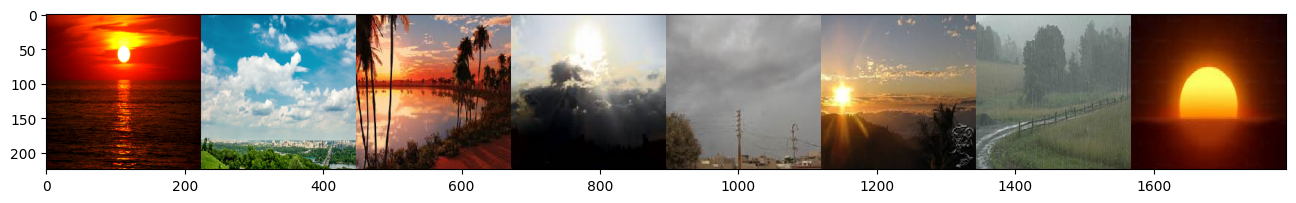

In [11]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

### Primeiro treinamento de uma rede neural do zero

Antes de fazermos o aprendizado por transferência, vamos primeiro construir uma rede neural do zero para fazer a classificação em nosso conjunto de dados. Isso nos dará uma linha de base para comparar com nossa rede com aprendizado por transferência posteriormente.

A rede que iremos construir contém 4 camadas alternadas de convolução e de max-pooling, seguidas por um [dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) após cada par de conv/pooling. Após a última camada de pooling, anexaremos uma camada totalmente conectada com 256 neurônios, outra camada de dropout e, finalmente, uma camada de classificação softmax para nossas classes.

Nossa função de perda será, como de costume, a perda de entropia cruzada categórica, e nosso algoritmo de aprendizado será o [AdaDelta](https://arxiv.org/abs/1212.5701). Diversos aspectos dessa rede podem ser alterados para obter um melhor desempenho, talvez usando uma rede maior ou um otimizador diferente possa ajudar, mas para os propósitos deste notebook, o objetivo é apenas obter uma compreensão de uma linha de base aproximada para fins de comparação, então não é necessário gastar muito tempo tentando otimizar esta rede.

Após compilar a rede, vamos executar `model.summary()` para obter uma visão geral de suas camadas.


In [12]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                  

Criamos uma rede de tamanho médio com cerca de 1,2 milhões de pesos e vieses (os parâmetros). A maioria deles está direcionada para a única camada totalmente conectada pré-softmax "dense_5".

Agora podemos prosseguir e treinar nosso modelo por 100 épocas com um tamanho de lote de 128. Também registraremos seu histórico para que possamos plotar a perda ao longo do tempo posteriormente.


In [13]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
13/13 [==============================] - 121s 9s/step - loss: 1.3553 - accuracy: 0.4533 - val_loss: 1.2252 - val_accuracy: 0.4837
Epoch 2/10
13/13 [==============================] - 120s 9s/step - loss: 1.1310 - accuracy: 0.5181 - val_loss: 1.0443 - val_accuracy: 0.5282
Epoch 3/10
13/13 [==============================] - 117s 9s/step - loss: 1.0255 - accuracy: 0.5060 - val_loss: 1.0256 - val_accuracy: 0.4243
Epoch 4/10
13/13 [==============================] - 115s 9s/step - loss: 0.9696 - accuracy: 0.4959 - val_loss: 0.9828 - val_accuracy: 0.4392
Epoch 5/10
13/13 [==============================] - 118s 9s/step - loss: 0.9364 - accuracy: 0.4794 - val_loss: 0.9018 - val_accuracy: 0.4748
Epoch 6/10
13/13 [==============================] - 125s 10s/step - loss: 0.9105 - accuracy: 0.4876 - val_loss: 0.9077 - val_accuracy: 0.4392
Epoch 7/10
13/13 [==============================] - 118s 9s/step - loss: 0.8852 - accuracy: 0.4984 - val_loss: 0.8677 - val_accuracy: 0.5134
Epoch 8/10
1

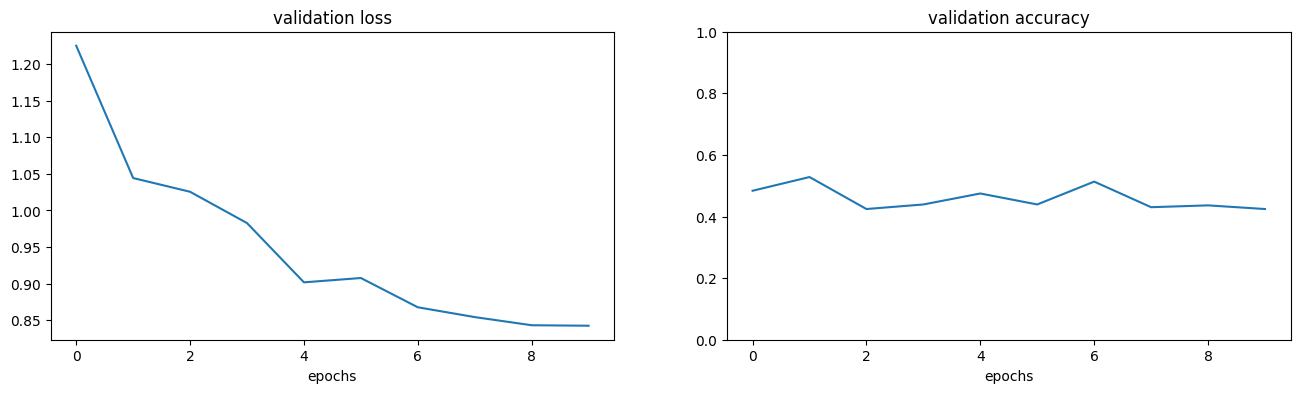

In [14]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.8966755867004395
Test accuracy: 0.42603549361228943


Finalmente, vemos que alcançamos uma precisão (top-1) de cerca de 49%. Isso não é tão ruim para 6000 imagens, considerando que, se usássemos uma estratégia ingênua de fazer palpites aleatórios, teríamos obtido apenas cerca de 1% de precisão.

## Aprendizado por transferência começando com uma rede existente

Agora podemos passar para a principal estratégia de treinamento de um classificador de imagens em nosso pequeno conjunto de dados: começando com uma rede maior e já treinada.

Para começar, vamos carregar o VGG16 do Keras, que foi treinado no ImageNet e cujos pesos estão salvos online. Se esta for a sua primeira vez carregando o VGG16, será necessário aguardar um pouco para que os pesos sejam baixados da web. Uma vez que a rede esteja carregada, podemos inspecionar as camadas novamente com o método `summary()`.


In [16]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 12s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

Observe que o VGG16 é _muito_ maior do que a rede que construímos anteriormente. Ele contém 13 camadas convolucionais e duas camadas totalmente conectadas no final, e tem mais de 138 milhões de parâmetros, cerca de 100 vezes mais do que a rede que fizemos acima. Como na nossa primeira rede, a maioria dos parâmetros está armazenada nas conexões que levam à primeira camada totalmente conectada.

O VGG16 foi criado para resolver o ImageNet e alcança uma [taxa de erro top-5 de 8,8%](https://github.com/jcjohnson/cnn-benchmarks), o que significa que 91,2% das amostras de teste foram classificadas corretamente dentro das cinco principais previsões para cada imagem. Sua precisão top-1 — equivalente à métrica de precisão que estamos usando (que a previsão principal está correta) — é de 73%. Isso é especialmente impressionante, pois não há apenas 97, mas 1000 classes, o que significa que palpites aleatórios nos dariam apenas 0,1% de precisão.

Para usar essa rede em nossa tarefa, "removemos" a camada de classificação final, a camada softmax de 1000 neurônios no final, que corresponde ao ImageNet, e a substituímos por uma nova camada softmax para nosso conjunto de dados, que contém 97 neurônios no caso do conjunto 101_ObjectCategories.

Em termos de implementação, é mais fácil simplesmente criar uma cópia do VGG da sua camada de entrada até a penúltima camada e trabalhar com isso, em vez de modificar o objeto VGG diretamente. Portanto, tecnicamente nunca "removemos" nada, apenas contornamos/ignoramos. Isso pode ser feito da seguinte maneira, usando a classe `Model` do Keras para inicializar um novo modelo cuja camada de entrada é a mesma do VGG, mas cuja camada de saída é nossa nova camada softmax, chamada `new_classification_layer`. Nota: embora pareça que estamos duplicando essa grande rede, internamente o Keras está apenas copiando todas as camadas por referência e, portanto, não precisamos nos preocupar em sobrecarregar a memória.


In [17]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

Vamos retreinar essa rede, `model_new`, no novo conjunto de dados e rótulos. Mas primeiro, precisamos congelar os pesos e vieses em todas as camadas da rede, exceto a nossa nova camada no final, com a expectativa de que as características aprendidas no VGG ainda sejam bastante relevantes para a nova tarefa de classificação de imagens. Não é o ideal, mas provavelmente é melhor do que o que podemos treinar em nosso conjunto de dados limitado.

Definindo a flag `trainable` como falsa em cada camada (exceto nossa nova camada de classificação), garantimos que todos os pesos e vieses nessas camadas permaneçam fixos, e treinamos apenas os pesos na camada final. Em alguns casos, é desejável *não* congelar todas as camadas pré-classificação. Se o seu conjunto de dados tiver amostras suficientes e não se parecer muito com o ImageNet, pode ser vantajoso ajustar algumas das camadas do VGG junto com o novo classificador, ou possivelmente todas elas. Para fazer isso, você pode alterar o código abaixo para tornar mais camadas treináveis.

No caso do CalTech-101, faremos apenas a extração de características, temendo que ajustar demais com esse conjunto de dados possa levar ao overfitting. Mas talvez estejamos errados? Um bom exercício seria testar ambos e comparar os resultados.

Então, prosseguimos e congelamos as camadas, e compilamos o novo modelo com exatamente o mesmo otimizador e função de perda da nossa primeira rede, para uma comparação justa. Em seguida, executamos `summary` novamente para ver a arquitetura da rede.


In [18]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Observando o resumo, vemos que a rede é idêntica ao modelo VGG que instanciamos anteriormente, exceto pela última camada, que antes era um softmax de 1000 neurônios e foi substituída por um novo softmax de 97 neurônios. Além disso, ainda temos aproximadamente 134 milhões de pesos, mas agora a grande maioria deles são "parâmetros não treináveis" porque congelamos as camadas nas quais estão contidos. Agora temos apenas 397.000 parâmetros treináveis, que na verdade são apenas um quarto do número de parâmetros necessários para treinar o primeiro modelo.

Como antes, prosseguimos e treinamos o novo modelo, usando os mesmos hiperparâmetros (tamanho do lote e número de épocas) de antes, junto com o mesmo algoritmo de otimização. Também mantemos o registro de seu histórico à medida que avançamos.


In [19]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))


Epoch 1/10
13/13 [==============================] - 1239s 96s/step - loss: 1.9811 - accuracy: 0.4419 - val_loss: 1.5008 - val_accuracy: 0.3205
Epoch 2/10
13/13 [==============================] - 1273s 99s/step - loss: 1.4672 - accuracy: 0.4070 - val_loss: 1.2303 - val_accuracy: 0.5371
Epoch 3/10
13/13 [==============================] - 1273s 99s/step - loss: 1.2954 - accuracy: 0.4838 - val_loss: 1.1404 - val_accuracy: 0.5460
Epoch 4/10
13/13 [==============================] - 1228s 95s/step - loss: 1.1834 - accuracy: 0.4927 - val_loss: 1.1047 - val_accuracy: 0.5608
Epoch 5/10
13/13 [==============================] - 1282s 100s/step - loss: 1.1581 - accuracy: 0.4800 - val_loss: 1.0662 - val_accuracy: 0.5312
Epoch 6/10
13/13 [==============================] - 1284s 100s/step - loss: 1.1175 - accuracy: 0.4959 - val_loss: 1.0469 - val_accuracy: 0.5579
Epoch 7/10
13/13 [==============================] - 1286s 100s/step - loss: 1.0720 - accuracy: 0.4851 - val_loss: 1.0536 - val_accuracy: 0.5

Os resultados do modelo mostram que a precisão de validação oscila em torno de 50%, o que indica que aproximadamente metade das previsões estão corretas. No entanto, a precisão não se mostra consistente ao longo das épocas de treinamento, variando entre 32% e 56% durante o processo. O modelo também apresenta uma perda considerável durante o treinamento e validação, indicando que há espaço para melhorias na sua eficiência e desempenho.


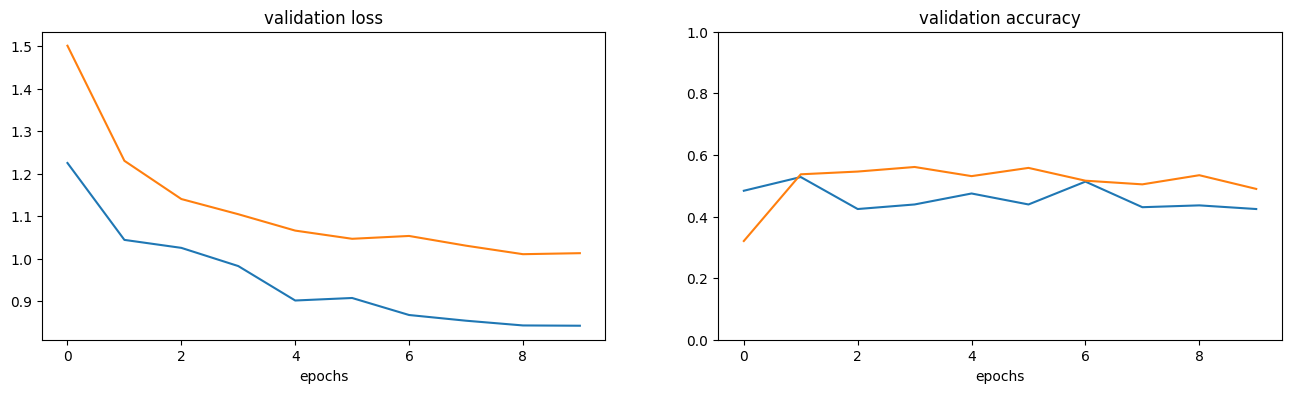

In [20]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [21]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.0703771114349365
Test accuracy: 0.5088757276535034


In [25]:
img, x = get_image('/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Cloudy/cloudy1.jpg')
probabilities = model_new.predict([x])


1/1 [==============================] - 1s 969ms/step


In [30]:
import os
import random

# Função para carregar a imagem e pré-processá-la
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

# Função para prever e mostrar a imagem com a classe predita
def predict_and_display(model, img_path, class_labels):
    img, x = get_image(img_path)
    probabilities = model.predict([x])

    predicted_class_index = np.argmax(probabilities)
    predicted_class_label = class_labels[predicted_class_index]
    predicted_probability = probabilities[0][predicted_class_index]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_label} ({predicted_probability:.2f} probability)")
    plt.axis('off')
    plt.show()

Para testar o modelo de classificação de tempo utilizando imagens específicas, siga estas instruções:

1. **Lista de Classes:**
   Certifique-se de ter uma lista de classes que corresponde exatamente à ordem usada durante o treinamento do modelo. Por exemplo:
   ```python
   class_labels = ['Cloudy', 'Rainy', 'Sunny']


1/1 [==============================] - 1s 1s/step


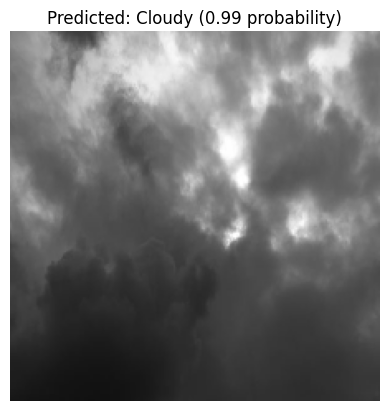

1/1 [==============================] - 1s 1s/step


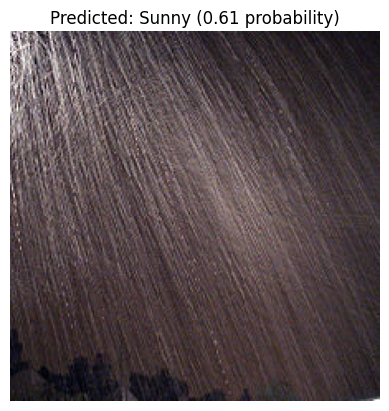

1/1 [==============================] - 1s 979ms/step


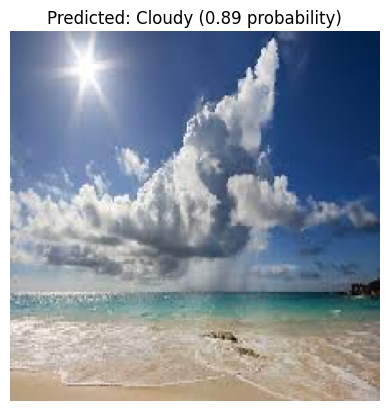

1/1 [==============================] - 1s 884ms/step


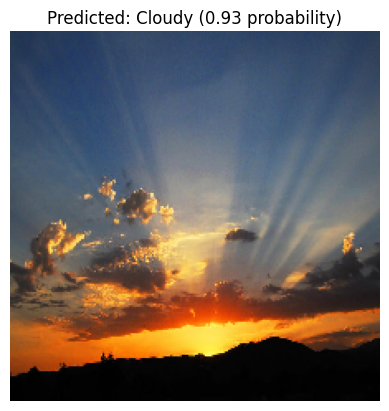

In [34]:
# Lista de classes (certifique-se de que a ordem é a mesma que foi usada durante o treinamento)
class_labels = ['Cloudy', 'Rainy', 'Sunny']  # Atualize com suas classes reais

# Caminhos das imagens para teste
test_image_paths = [
    '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Cloudy/cloudy1.jpg',
    '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Rain/rain2.jpg',
    '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Shine/shine3.jpg',
    '/content/drive/MyDrive/[00]Workbench/transfer-learning-multi-class-weather-classification/datasets/Sunrise/sunrise4.jpg'


]

# Testar cada imagem
for img_path in test_image_paths:
    predict_and_display(model_new, img_path, class_labels)

## Melhorias e Abordagens para Melhorar a Precisão do Modelo de Classificação de Tempo

O desempenho insatisfatório do modelo ao realizar previsões pode ser melhorado com algumas estratégias e ajustes adicionais:

### 1. **Aumento do Conjunto de Dados:**
   - **Problema:** Um conjunto de dados maior e mais diversificado pode melhorar a capacidade do modelo de generalizar para diferentes condições meteorológicas.
   - **Solução:** Coletar mais imagens de várias condições climáticas, garantindo que cada classe tenha uma representação adequada.

### 2. **Aumento da Complexidade do Modelo:**
   - **Problema:** O modelo atual pode não ter capacidade suficiente para aprender características complexas das imagens.
   - **Solução:** Experimentar com arquiteturas mais complexas, como redes neurais mais profundas ou modelos pré-treinados mais avançados, como ResNet, Inception, ou EfficientNet.

### 3. **Ajuste de Hiperparâmetros:**
   - **Problema:** Os hiperparâmetros atuais podem não estar otimizados para o conjunto de dados e a tarefa específica.
   - **Solução:** Realizar uma busca sistemática de hiperparâmetros, ajustando valores como taxa de aprendizado, tamanho do lote, taxa de dropout, e regularização.

### 4. **Data Augmentation (Aumento de Dados):**
   - **Problema:** A falta de variação nos dados de treinamento pode limitar a capacidade do modelo de generalizar.
   - **Solução:** Aplicar técnicas de aumento de dados durante o treinamento, como rotação, espelhamento, zoom e deslocamento, para aumentar a diversidade das imagens disponíveis.

### 5. **Alternativas ao Transfer Learning com ImageNet:**
   - **Problema:** O uso do ImageNet e transfer learning pode não capturar efetivamente as características específicas das imagens de tempo.
   - **Solução:** Considerar treinar o modelo a partir do zero com um conjunto de dados específico de tempo, ajustando as camadas e arquitetura do modelo para melhor se adaptar às características das imagens de tempo.

### 6. **Avaliação e Interpretação dos Resultados:**
   - **Problema:** O modelo pode estar cometendo erros sistemáticos em certas classes devido a desequilíbrios no conjunto de dados ou características mal representadas.
   - **Solução:** Realizar uma análise detalhada dos erros cometidos pelo modelo, identificando padrões e ajustando o conjunto de dados ou o modelo conforme necessário.

### 7. **Utilização de Métricas Adicionais:**
   - **Problema:** A precisão (accuracy) pode não ser a métrica mais informativa dependendo do problema.
   - **Solução:** Considerar o uso de métricas adicionais como precisão (precision), recall e F1-score, especialmente se houver desequilíbrio entre as classes.

### 8. **Regularização e Dropout:**
   - **Problema:** Overfitting pode estar ocorrendo devido à complexidade do modelo ou ao tamanho limitado do conjunto de dados.
   - **Solução:** Implementar regularização L1/L2 e dropout para mitigar o overfitting, incentivando o modelo a generalizar melhor.

### 9. **Revisão e Iteração:**
   - **Problema:** A solução inicial pode não ser a mais eficaz ou eficiente.
   - **Solução:** Iterar continuamente sobre o modelo, implementando melhorias incrementais com base na análise de desempenho e feedback.

Implementando estas estratégias e ajustes, é possível melhorar significativamente a precisão e robustez do modelo de classificação de tempo, tornando-o mais confiável e preciso para aplicações práticas.
